# Checklist
- Data Info
- Data Types
- Missing Values
- Duplicated Values
- Unique Values
- Distributions & Outliers
- Correlations

# Task Details
Every dataset has a story and this set is pulled from IMDb.com of all the Indian movies on the platform.   
Clean this data by removing missing values or adding average values this process will help to manipulate the data to help with your EDA.   
Analyze data and provide some trends.
- Year with best rating
- Does length of movie have any impact with the rating?
- Top 10 movies according to rating per year and overall.
- Number of popular movies released each year.
- Counting the number of votes which movies preformed better in rating per year and overall.
- Any other trends or future prediction you may have
- Which director directed the most movies
- Which actor starred in the movie
- Any other trends you can find

Build a model that predicts the rating of a movie based on 
features like genre, director, and actors.
 You can use regressio 
techniques to tackle this problem.
The goal is to analyze historical movie data and develop a mo el
that accurately estimates the rating given to a movie by user  or
critics.
Movie Rating Prediction project enables you to explor  data
analysis, preprocessing, feature engineering, and machine
learning modeling techniques. It provides insights into the factors
that influence movie ratings and allows you to build a model that
can estimate the ratings of movies accurately.

# Data Source
https://www.kaggle.com/datasets/adrianmcmahon/imdb-india-movies

# Imports

In [1]:
import os
import numpy as np
import pandas as pd

In [2]:
from data_gadgets.cleaning import Cleaner
from data_gadgets.visualization import Visualizer

# Reading Data

In [3]:
path = os.path.join('..', '..', 'data', 'raw', 'data_task2.csv')
data = pd.read_csv(path, encoding='ansi')

In [4]:
data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


# Data Info

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


# Data Types

In [6]:
cleaner = Cleaner()
cols = cleaner.separate_data(data, 'Rating')
cols

{'target': ['Rating'],
 'time': [],
 'category': [],
 'category+': ['Name',
  'Year',
  'Duration',
  'Genre',
  'Votes',
  'Director',
  'Actor 1',
  'Actor 2',
  'Actor 3'],
 'continuous': [],
 'continuous+': [],
 'discrete': []}

# Missing Values

In [7]:
data.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

# Duplicated Values

In [8]:
data.duplicated().sum()

6

# Unique Values

In [9]:
data.nunique()

Name        13838
Year          102
Duration      182
Genre         485
Rating         84
Votes        2034
Director     5938
Actor 1      4718
Actor 2      4891
Actor 3      4820
dtype: int64

# Distributions

In [10]:
data.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [11]:
visualizer = Visualizer()

## Time

In [12]:
try:
    visualizer.multivariate_subplots(data[cols['continuous']+cols['time']], cols['time'][0], kind='time')
except:
    pass

## Continuous

In [13]:
visualizer.univariate_subplots(data[cols['continuous']], 'boxplot', 2, 2)

<Figure size 1920x1080 with 0 Axes>

In [14]:
visualizer.univariate_subplots(data[cols['continuous']], 'numerical_counts', 2, 2)

<Figure size 1920x1080 with 0 Axes>

## Discrete

In [15]:
visualizer.univariate_subplots(data[cols['discrete']], 'category_counts', 2, 2)

<Figure size 1920x1080 with 0 Axes>

## Categorical

In [16]:
visualizer.univariate_subplots(data[cols['category']], 'category_counts', 2, 2)

<Figure size 1920x1080 with 0 Axes>

## Target

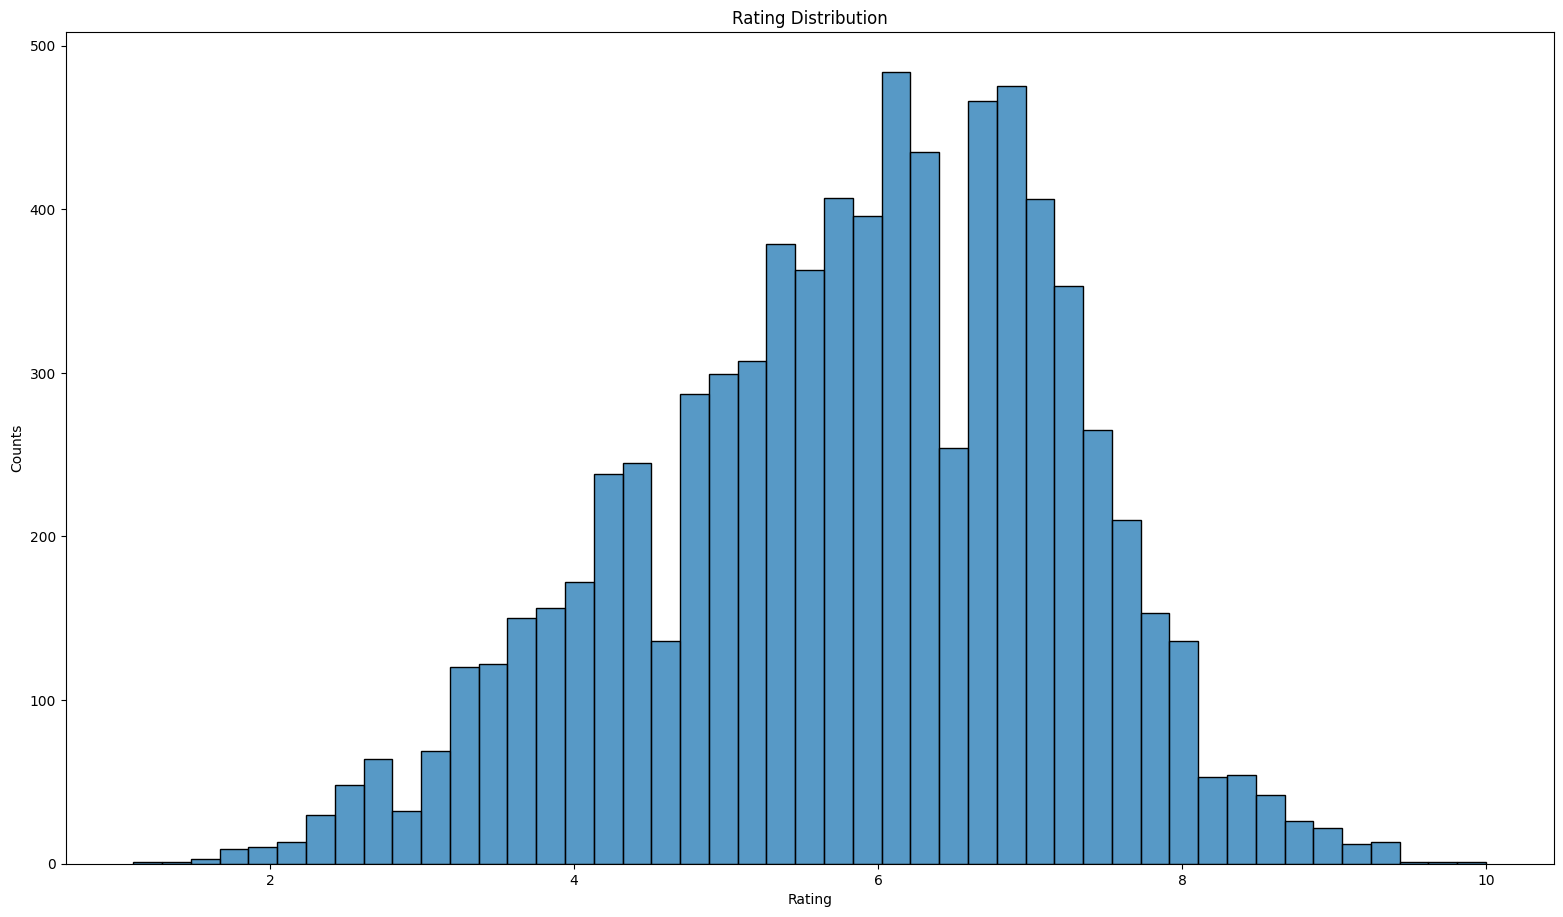

In [17]:
try:
    visualizer.numerical_counts(data, cols['target'][0])
except:
    visualizer.category_counts(data, cols['target'][0])

In [18]:
try:
    visualizer.multivariate_subplots(data[cols['time']+cols['target']], cols['time'][0], kind='time')
except:
    pass

# Correlations

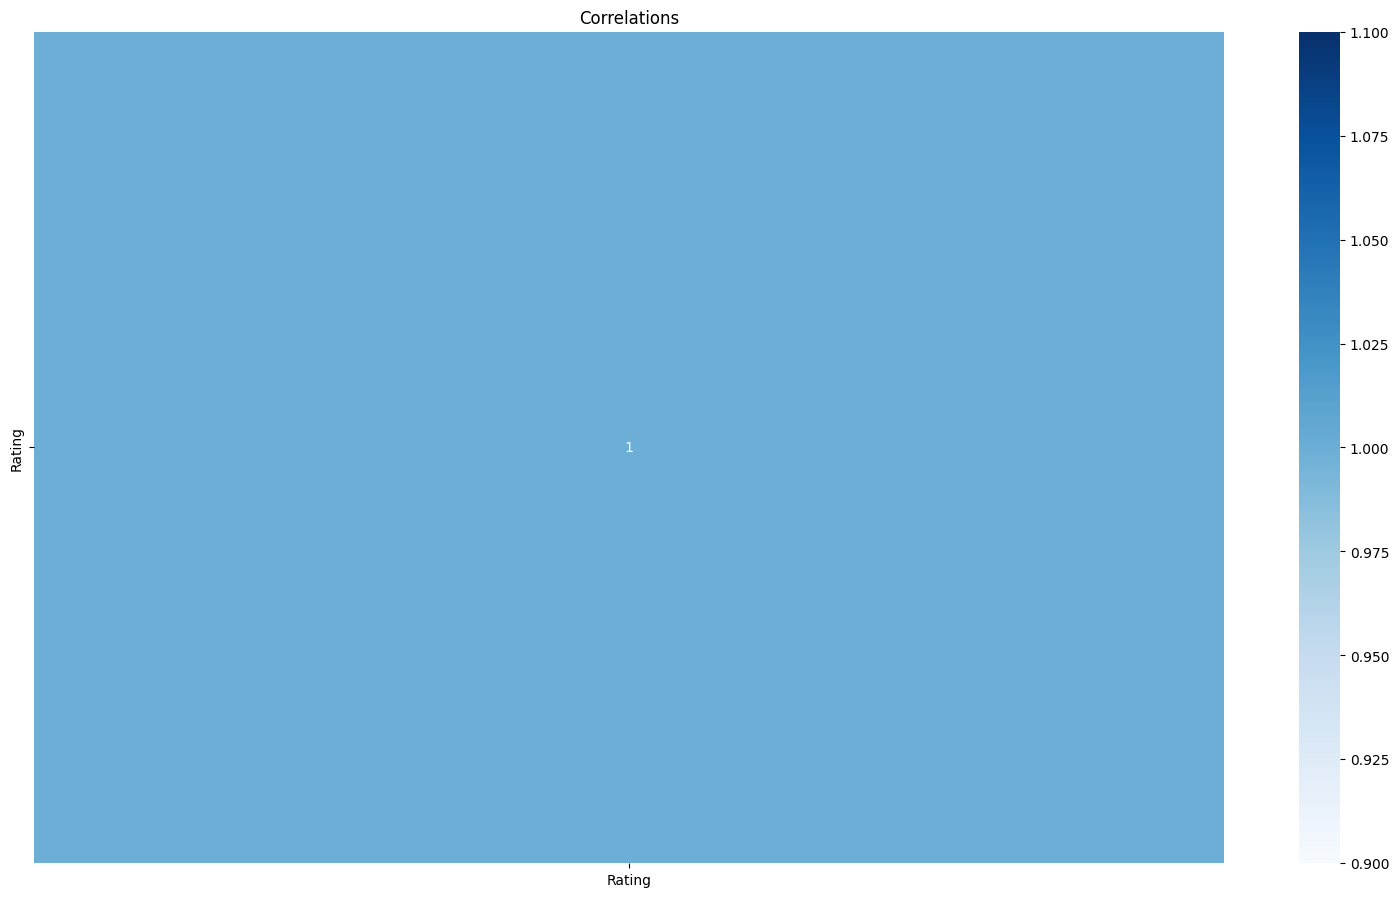

In [19]:
visualizer.correlations(data, cols['continuous']+cols['discrete']+cols['target'])

In [20]:
visualizer.multivariate_subplots(data[cols['continuous']+cols['target']], cols['target'][0], 'relationship', max_rows=2, max_cols=2)

<Figure size 1920x1080 with 0 Axes>

# Conclusion
- Missing Values: Too Many
- Duplicated Values: Few
- Outliers: Probably few
- Notes
    - Some of columns have wrong data types